<a href="https://colab.research.google.com/github/GuacamoleKoala/EuropeanaTeapots/blob/main/ManualEuropeanaTeapots_Chapter2_DataRefinement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**A Cup of Tea? Teapots, Metadata and AI on Europeana**
Author: Jenske Verhamme,
Date: 22/04/2025



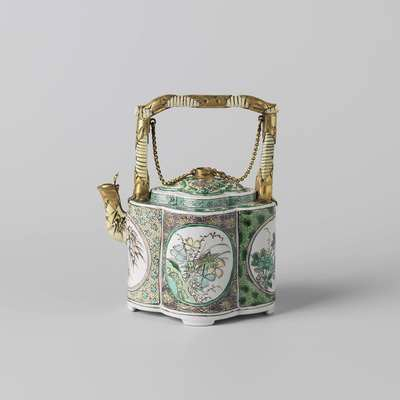

'Viermaal gelobde theepot met bloeiende planten' in Rijksmuseum

Image Link: https://www.europeana.eu/nl/item/90402/AK_RBK_15893

# Introduction

In this chapter I will look at how to clean, refine and enrich a dataset in OpenRefine. Specifically I will look at the dataset of chapter one, for which we wrote a script. This dataset is an extraction of all teapot related records in the collection on Europeana.

First I look at how to download the dataset. Next, I look at some basic and more complex operations in OpenRefine. I will look at cleaning the dataset by removing whitespace, extra characters and duplicates. I also look into clustering, facetting, cross referencing, and so on. Next I look at some regular expressions to gain metadata about materials, years, rights and longitude/latitude. Next, I look at enrichment and reconcilliation via Wikidata. I look into the concepts field as well as the cities, countries and size related data.

At the end of this chapter I will explain how to export the project.



## Table of Contents:

CHAPTER TWO: DATA REFINEMENT

2.0: Downloading the dataset via scripting

2.1: Cleaning the dataset in OpenRefine

  2.1.1 Renaming, sorting, collapsing and deleting columns

  2.1.2 Deleting whitespace and duplicates

  2.1.3 Regular expressions

*  Simple variations

*  Complex transformations

*  Multiple complex transformations

* Related Concepts

* Date, Year, Century

* Rights and licenses

* Longitude and latitude


  
  2.1.4: Manual deleting

2.2: Enrichment of the dataset in OpenRefine

  2.2.1 Reconciling Wikidata and/or Getty

  2.2.2 More datacleaning: working out the concepts field

  2.2.3 Size data and cross reference

  2.2.4 Add column based from reconciled data

  2.2.5 joining the cities/countries columns + cleaning duplicates?
2.3 Neverending refining
  
  2.3.0 Full cleanup

  2.3.1 Overview

  2.3.2 Export and next steps






---



# CHAPTER TWO: DATA REFINEMENT


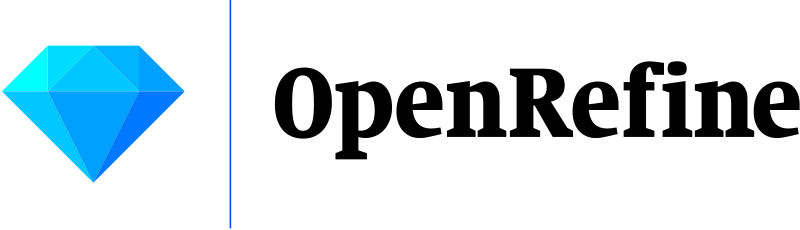


In the previous chapter we looked at how to retrieve a dataset from Europeana via API. Because Europeana aggregates many collections of many different organisations and institutions, these data are very diverse qua content and way of notation. As mentioned earlier, Europeana uses the European data model (edm) and Dublin Core (DC) metadata standards. This means the data is properly standardized, but in practice the data is often incomplete. Concretely, this means that a lot of records do not have all fields filled in properly, far from it even: a lot of fields are empty. Europeana even provides a metadata field in their structure that shows the 'completeness' of a record. This in turn means that a lot of the data is inconsistent within the metadata fields. From this we can conclude that the task of cleaning and returning a usefull dataset will not be easy.

Practically this chapter starts from the dataset extracted from the script and provide a final version of the cleaned dataset through OpenRefine. To do this, many different possible steps will be presented.

# 2.0: Downloading the dataset via scripting

This step was implicitatly integrated in chapter one, but will here be stated explicitly for convenience. Before we can start, we need to download the dataset. In Google Colab this process takes an extra step, because we have to download it from Colab to our local drive.
Important to note is that we can download the dataset in different formats such as csv, Json, xlx, etcetera. In this case we opt for the csv. In chapter one also the Json format was also consulted.

To download the dataset from Colab to your local drive can be done with a simple script (see below). This script is already integrated in the full working code made earlier.

In [ ]:
# part of script to download file from Google Colab to local drive

if 'google.colab' in str(get_ipython()):
    files.download(csv_file_path)

# 2.1: Cleaning the dataset in OpenRefine

First I upload the dataset in OpenRefine. When I open the dataset in openRefine, I get 4063 records with multiple columns referring to the fields we extracted with the script. These need to be further divided into more columns, so the data needs to be restructured. This can be done by parsing them on the condition of certain characters (f.e. with GREL language or python in OpenRefine, or even manually).

A first remark I want to adress before going on, is about the difference between the estimated number of extracted records and the actual amount of records. These numbers can differ a lot: one of the reasons is that the estimated number does not account for duplicates.

> example: a record with a hit in English and in French will be counted twice, while the script deletes them in a later phase, resulting in the actual number.

## 2.1.1 Renaming, sorting, collapsing and deleting columns

**Proper naming**

In a first step I sorted the columns and give them a proper name that is more clear to me. This way it is easier to see what the data represents and how I could use it for data analysis and visualisation. After I have choosen better names for the columns to work with. I keep the original in brackets behind the new name, so I can track this info later, if necessary.

> example: the name of column field 'edmPlaceAltLabel' was changed into Plaats (edmPlaceAltLabel)

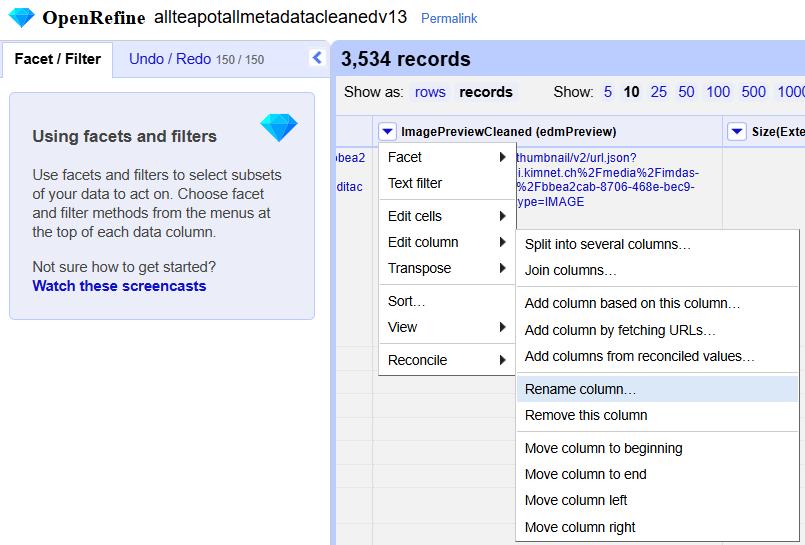


**Sorting columns/fields**

After choosing the appriopriate name fields, I sorted the order the columns. In this case this means that I moved the position of the columns. I did this so I could group all data that was related accordingly,  f.e. dates, titles, concepts, places, links. You can do this by clicking 'move column to beginning', 'move column left', and so on (see picture above).

> example: the four columns below are put next to eachother, instead of one at the beginning, two in the middle and one in the end.
'Plaats (edmPlaceAltLabel)', 'PlaatsLabel (edmPlaceLabelLangAware)', 'PlaatsLabelCleaned (edmPlaceLabelLangAware)', 'PlaatsAltLabel (edmPlaceAltLabelLangAware)'

**Making copies (of copies) of columns**

Practically, I make a copy for each column with the suffix 'cleaned' in the columnname to transform it in a later phase. This column is self-explanatory, as it will serve as placeholder for the cleaned version of the data in the original column. If multiple transformations are done, it is advised to make multiple copies one after another to keep track of changes or errors during transformation.

> example: the column with field name 'PlaatsLabel (edmPlaceLabelLangAware)' gets a copy with the name 'PlaatsLabelCleaned (edmPlaceLabelLangAware)'. After clustering, it gets a copy with the name 'PlaatsLabelCleanedClustered'. You can do this by clicking on the 'add column based on this column' function.

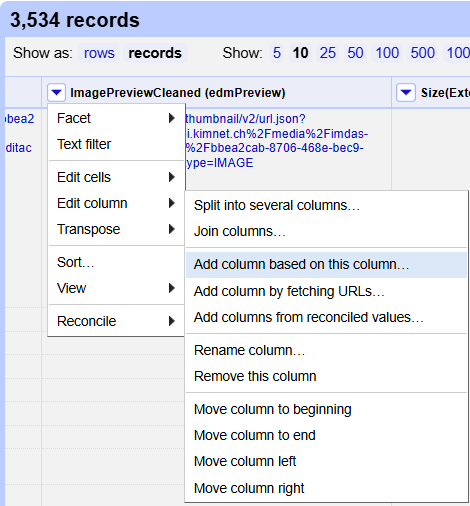

**Collapsing and/or Deleting columns**

In a next phase we can decide to collapse or delete certain columns. This can be interesting to select specific material or to save space and computing power. In this case I tried to keep the original columns for as long as possible, but this became quite impossible after a while.
I started with making the columns invisible by collapsing them.

> examples of collapsed column: 'PlaatsLabel (edmPlaceLabelLangAware)' gets collapsed, so only 'PlaatsLabelCleaned (edmPlaceLabelLangAware)' is visible.

As the renamed columns are mapped to their original file that is retrievable via the script we wrote earlier, I decided to delete the original files, after I was certain the cleaned file did not lose any valuable content. Also, if you close and re-open a project in OpenRefine all your collapsed columns are visible again, which is inconvenient.

> examples of deleted column: 'PlaatsLabel (edmPlaceLabelLangAware)' gets deleted, instead of collapsed. 'PlaatsLabelCleaned (edmPlaceLabelLangAware)' remains visible.

This problems grows to a different scale if we make multiple copies of a column/field. There it is hard to decide how many different transformations to keep and which ones to delete.

> example: These fields below are all related to 'PlaatsLabel (edmPlaceLabelLangAware). All could be deleted, except the last (final) one. The steps of these transformations will be explained further on.

    PlaatsLabel (edmPlaceLabel),
    PlaatsLabelCleanedClustered (edmPlaceLabel),
    PlaatsLabelCleanedClusteredJoinednoDuplicates,
    PlaatsLabelCleanedClusteredJoinednoDuplicatesReconciled,
    PlaatsLabelCleanedClusteredJoinednoDuplicatesReconciledExtracted

## 2.1.2 Deleting whitespace and duplicates

Next I noticed that some records contained whitespaces at the beginning or even multiple in the middle of a string. Therefore I consequently use the trim() function, as well as the common transform function in OpenRefine to delete these whitespaces. Another function I use repeatly, is deleting duplicate rows. This can be done by selecting all at the first column and click on the function 'edit rows' and 'delete all duplicates'.

An important action I also perform when doing different transformations is the common transformations for a column called 'trim leading and trailing whitespaces' and 'collapse consecutive whitespace'. To do this one clicks on the arrow next to a column and chooses 'edit cells', then 'common transformations' and then 'trim leading and trailing whitespaces' or 'collapse consecutive whitespace'  This makes sure that all extra whitespaces are cleaned up, which results in better handling of facets and further division of columns.


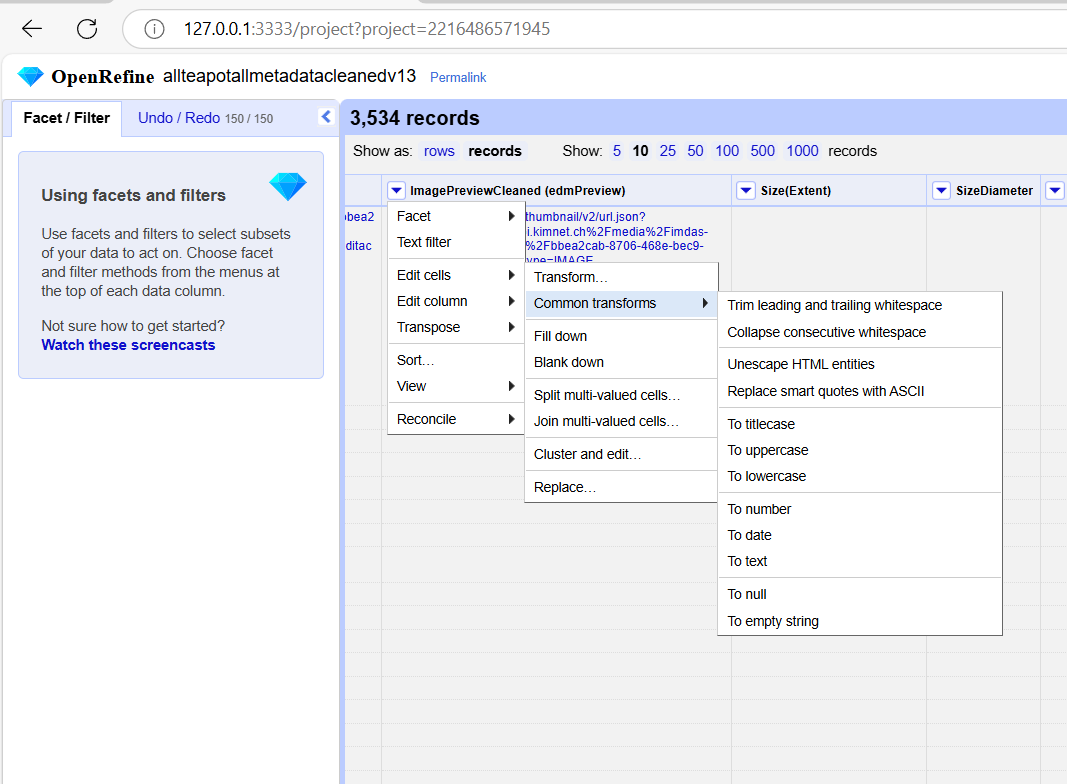

## 2.1.3 Regular expressions

If we transform cells we can add GREL language or Python script to adjust the values of the cells (or import new values from another file). If we for example click 'add column based on this column', we see a screen where we can enter a GREL expression. More quick overview info on GREL language in OpenRefine can be found [here](https://datenschule.de/files/downloads/workshops/CheatSheet-Open-Refine.pdf).

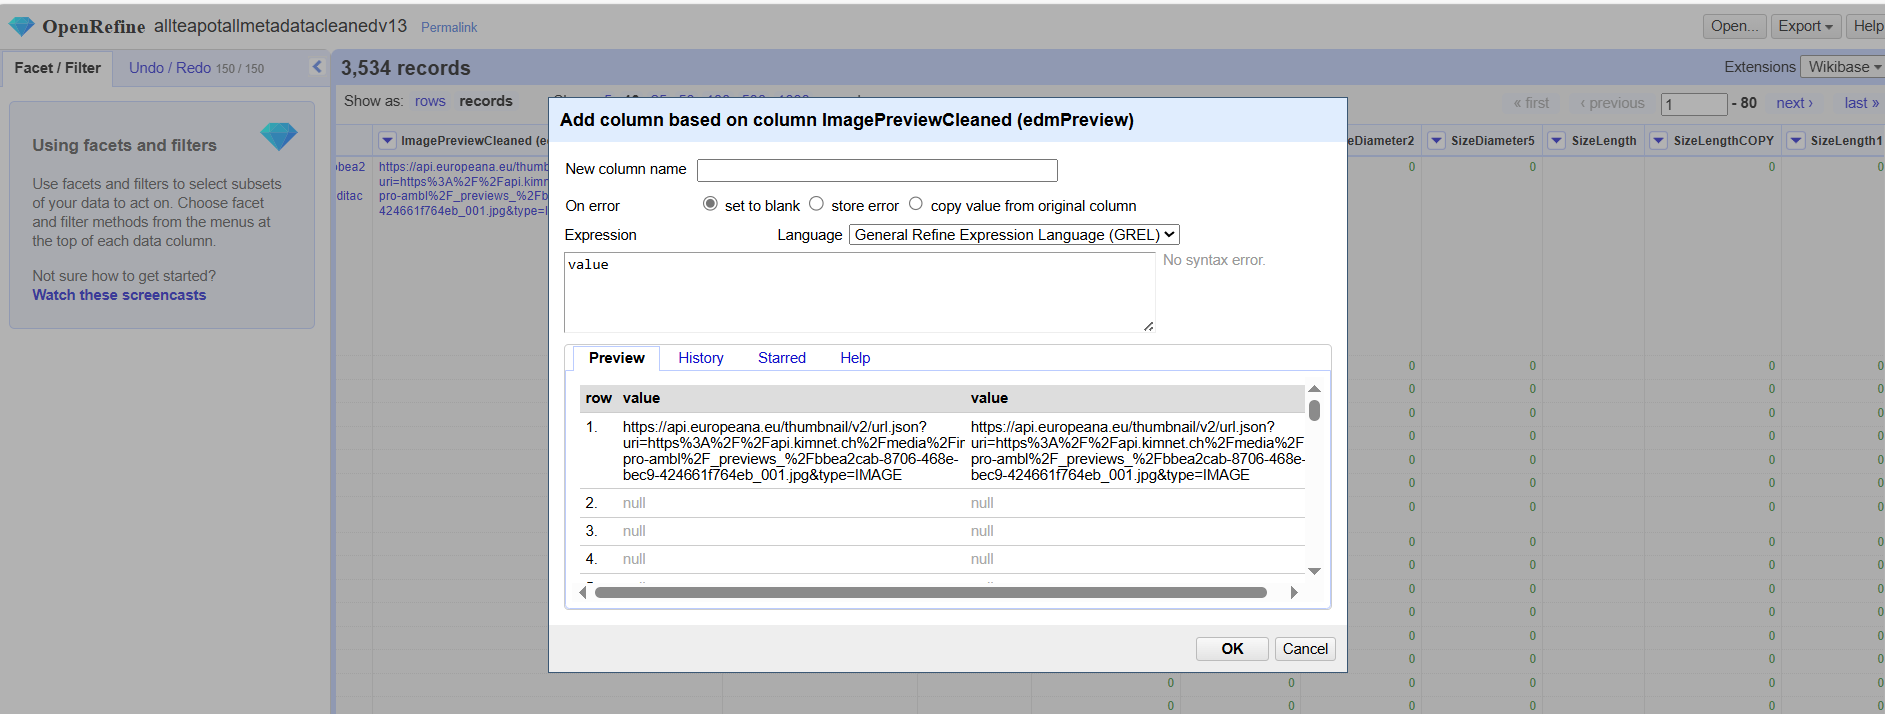




If we give a name in the 'new column name' and press 'ok' with adjusting the value, we will just get a copy of the original column we performed this action on. But if we enter a new expression, we can clean and manipulate the data in several ways.


### 1. Simple variations

First I started deleting extra characters by using the replace function. Some columns were easily cleaned by this procedure.

code: `value.replace("['", "").replace("']", "")`

> Example: ['Belgium'] gets transformed into Belgium

### 2. Complex transformations

Next I started deleting more complex character combinations. In the example below I use the trim and replace function, together with some open signifier to capture all combinations of two characters such as 'de', 'pl', etcetera. This strategy cleaned up most of the columns. More documentation about GREL can be found [here](https://openrefine.org/docs/manual/grel) and [here](https://openrefine.org/docs/manual/grelfunctions).

code: `value.trim().replace(/'\w{2}':\s*\[(.*?)\]/, '$1').replace('{', '').replace('}', '').replace(']', '').replace("'", "").replace("def:", "")`

>Example: the record below gets transformed into a clean record via GREL function.

> Original: {'de': ['Ethnologie', 'Frischhaltegefässe, Kühlgefässe'],
'def': ['http://vocab.getty.edu/aat/300053658', 'http://data.europeana.eu/concept/121']}

> Transformed: Ethnologie, Frischhaltegefässe, Kühlgefässe,  http://vocab.getty.edu/aat/300053658, http://data.europeana.eu/concept/121



### 3. Multiple complex transformations

For the remaining columns unique strategies have to be implemented.
This will demand more complex strategies that use multiple transformations and many different columns.

Below I will tackle four specific cases regarding related concepts, date/time, licenses and longitude respectivly.





#### **Related Concepts**

The dataset consists of multiple fields that are related to concepts and types that are associated with the object. What I want to do, is separate these concepts, so they can be counted. In the case of our teapots, this may results in information about the material composition. In what follows, we would like to count how many teapots consist of what kinds of material. Therefore we need to make several actions in OpenRefine, which also show the potential of this tool.

> RelatedConcepts (edmConceptPrefLabelLangAware): {'de': ['Ethnologie', 'Porzellan', 'Messing'], 'fi': ['Kansatiede', 'Posliini', 'Messinki'], 'ru': ['Фарфор', 'Латунь', 'Этнология'], 'pt': ['Porcelana', 'Latão', 'Etnologia'], 'bg': ['Месинг', 'Етнология', 'Порцелан'], 'lt': ['Porcelianas', 'Etnologija', 'Žalvaris'], 'lv': ['Etnoloģija', 'Porcelāns', 'Misiņš'], 'hr': ['Porculan', 'Etnologija', 'Mjed'], 'fr': ['Porcelaine', 'Ethnologie', 'Laiton'], 'hu': ['Sárgaréz', 'Porcelán', 'Etnológia'], 'sk': ['Mosadz', 'Porcelán', 'Etnológia'], 'sl': ['Medenina', 'Etnologija', 'Porcelan'], 'ga': ['Prás', 'Eitneolaíocht', 'Poirceallán'], 'ca': ['Llautó', 'Porcellana', 'Etnologia'], 'sv': ['Mässing', 'Etnologi', 'Porslin'], 'el': ['Ορείχαλκος', 'Πορσελάνη', 'Εθνολογία'], 'en': ['Porcelain', 'Brass', 'sewing (needleworking technique)', 'Ethnology'], 'it': ['Ottone', 'Porcellana', 'Etnologia'], 'es': ['Porcelana', 'Latón', 'cosido (proceso)', 'Etnología'], 'et': ['Portselan', 'Messing', 'Etnoloogia'], 'cs': ['Etnologie', 'Porcelán', 'Mosaz'], 'eu': ['Letoi', 'Etnologia', 'Portzelana'], 'pl': ['Porcelana', 'Mosiądz', 'Etnologia'], 'ro': ['Etnologie', 'Porțelan', 'Alamă'], 'da': ['Etnologi', 'Porcelæn', 'Messing'], 'nl': ['naaien (naaldwerkprocedé)', 'Etnologie', 'Messing', 'Porselein']}

This gets cleaned with the GREL expression used earlier (see below).

code: `(value.trim().replace(/'\w{2}':\s*\[(.*?)\]/, '$1').replace('{', '').replace('}', '').replace(']', '').replace("'", "").replace("def:", "")`

result:

> RelatedConceptsCleaned (edmConceptPrefLabelLangAware): Ethnologie, Porzellan, Messing, Kansatiede, Posliini, Messinki, Фарфор, Латунь, Этнология, Porcelana, Latão, Etnologia, Месинг, Етнология, Порцелан, Porcelianas, Etnologija, Žalvaris, Etnoloģija, Porcelāns, Misiņš, Porculan, Etnologija, Mjed, Porcelaine, Ethnologie, Laiton, Sárgaréz, Porcelán, Etnológia, Mosadz, Porcelán, Etnológia, Medenina, Etnologija, Porcelan, Prás, Eitneolaíocht, Poirceallán, Llautó, Porcellana, Etnologia, Mässing, Etnologi, Porslin, Ορείχαλκος, Πορσελάνη, Εθνολογία, Porcelain, Brass, sewing (needleworking technique), Ethnology, Ottone, Porcellana, Etnologia, Porcelana, Latón, cosido (proceso), Etnología, Portselan, Messing, Etnoloogia, Etnologie, Porcelán, Mosaz, Letoi, Etnologia, Portzelana, Porcelana, Mosiądz, Etnologia, Etnologie, Porțelan, Alamă, Etnologi, Porcelæn, Messing, naaien (naaldwerkprocedé), Etnologie, Messing, Porselein

Next I choose 'edit cells' of the cleaned column, so I could select 'split multi-valued cells' and separate by the " ' " sign. This way the row of the record with the string of information gets split into different values, according to the separator and it becomes a multi-valued cell. This means the value gets split over multiple rows, which now contain the values separatly, but are still joined in one record (hence the difference between rows and records in OpenRefine).

In a next step I want to cluster concepts which are related to eachother, for example by language. I repeat this clustering process several times.

> example: a record can contain 'porcelain', 'porzellan', 'porcelena', 'porselein', and many other variations, but these all refer to 'porcelain'. To clean this, we can all give them the same content. To do this, I make a text facet of the cleaned and multi-valued column and select cluster on the left. Here I cluster and experiment with the different possibilities, until I have clustered as much as possible. When I accept the cluster, all values get transformed accordingly. This results for example in that 'porcelain', 'porzellan', 'porcelena', 'porselein' all get clustered under the facet 'porcelain'. I create this column in a new column.

In the image below you can see how to select the text facet. Once it is created on the left, you can sort it by count. This gives you an overview of what is most present in the concept list.

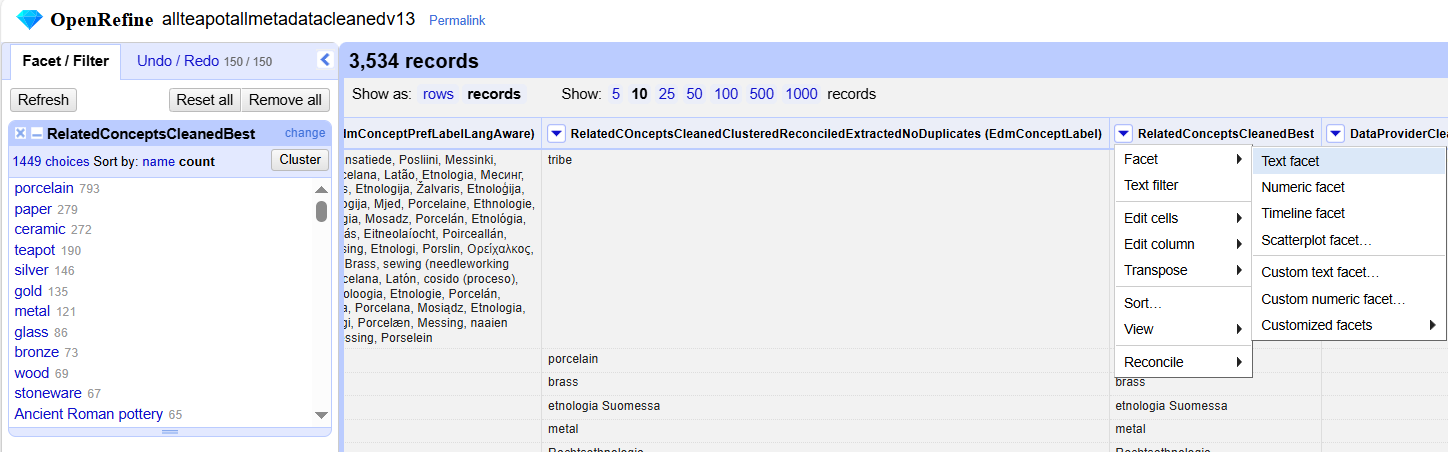

In the image below you can see the cluster function that can be accessed via the facet menu. Here OpenRefine will try to homogenize data that is similar.

> Example: 'porcelain', 'porcelaine', 'porzelain', and even wider variations will all be suggested to get the same tag 'porcelain'.

There are many sorting and clustering algoritms that can be used and experimented with. Again, for this dataset I repeated the clustering process several times, until I had the feeling my data was more clean.

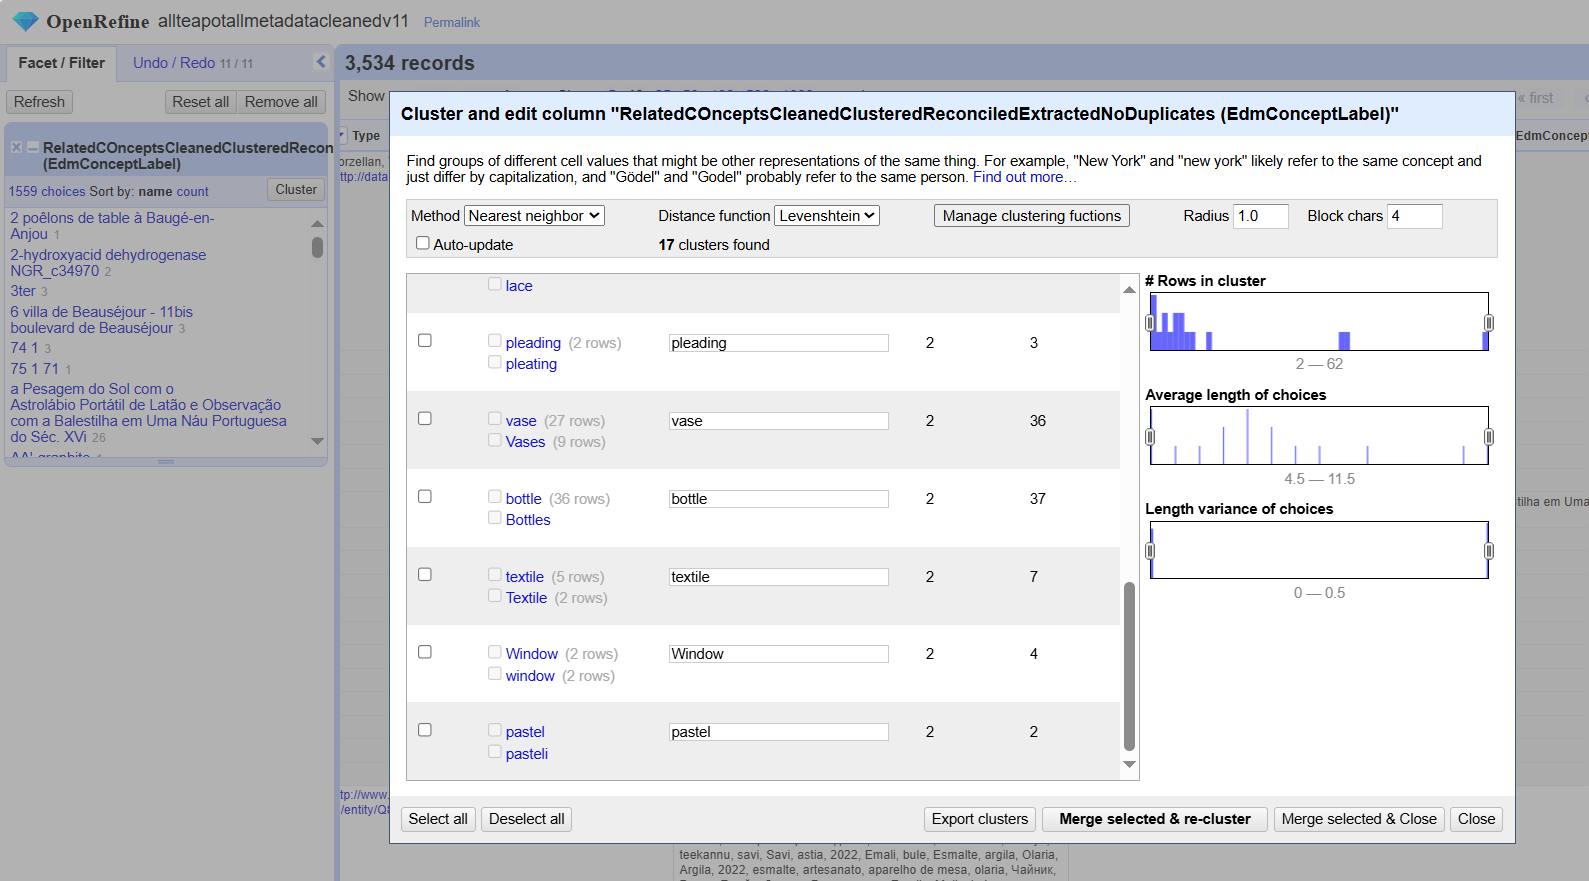

In a next step I want to delete all the double mentions of porcelain, because if we now use a text facet and filter on count, we will get much more results of porcelain, because they are present multiple times in a record, and are counted as such accordingly. This gives a false representation of the number of times a concept appears.
To delete the duplicates I transform the splitted multi-value cell back into one cell by selecting the 'edit cells' and then 'join multi-valued cells', deleting the separator.
Next I use a GREL function to delete the duplicates in the joined string. To do this I make use of the split function, uniques function, and join function.

Code: `value.split(",").uniques().join(",")`

> Example:
Original: RelatedCOnceptsCleanedClusterJoinedAgain (EdmConceptLabel): Messing,  Etnologia,  Porcelain,  Messinki,  Kansatiede,  Porcelain,  Латунь,  Етнология,  Фарфор,  Latão,  Etnologia,  Porcelain,  Месинг,  Етнология,  Порцелан,  Žalvaris,  Etnologia,  Porcelain,  Misiņš,  Etnologia,  Porcelain,  Mjed,  Etnologia,  Porcelain,  Laiton,  Etnologia,  Porcelain,  Sárgaréz,  Etnologia,  Porcelain,  Mosadz,  Etnologia,  Porcelain,  Mediena,  Etnologia,  Porcelain,  Prás,  Eitneolaíocht,  Porcelain,  Llautó,  Etnologia,  Porcelain,  Mässing,  Etnologia,  Porcelain,  Ορείχαλκος,  Εθνολογία,  Πορσελάνη,  Brass,  Ethnology,  sewing (needleworking technique),  Porcelain,  Ottone,  Etnologia,  Porcelain,  Latón,  Etnologia,  cosido (proceso),  Porcelain,  Messing,  Etnologia,  Porcelain,  Mosaz,  Etnologia,  Porcelain,  Letoi,  Etnologia,  Porcelain,  Mosiądz,  Etnologia,  Porcelain,  Alamă,  Etnologia,  Porcelain,  Messing,  Etnologia,  Porcelain,  Messing,  Etnologia,  naaien (naaldwerkprocedé),  Porcelain

result:

> Messing,   Etnologia,   Porcelain,   Messinki,   Kansatiede,   Латунь,   Етнология,   Фарфор,   Latão,   Месинг,   Порцелан,   Žalvaris,   Misiņš,   Mjed,   Laiton,   Sárgaréz,   Mosadz,   Mediena,   Prás,   Eitneolaíocht,   Llautó,   Mässing,   Ορείχαλκος,   Εθνολογία,   Πορσελάνη,   Brass,   Ethnology,   sewing (needleworking technique),   Ottone,   Latón,   cosido (proceso),   Mosaz,   Letoi,   Mosiądz,   Alamă,   naaien (naaldwerkprocedé)

In a final step we can split it into a multi-valued cell and run a text facet. If we now look at the results, we will find a much more consistent representation of (the count) of concepts. Of course, many strategies can still be applied.

> Notice for example that 'Porcelain' is still not clustered with 'Πορσελάνη' (Greek translation). But this does not matter too much, as we know for sure that a notion of 'porcelain' got captured with our method. Further on in this chapter, I will look at reconciling data via wikidata (or Getty images). This might result in a more standardized list of concepts.

####**Date, Year, Century**

Next I want to use GREL language to extract the proper centuries or years from the data fields that are related to dates, periods and years. At the moment they are not usefull, because of the many variations that are present in the notation. I want to standardize as much records as possible, yet all will not be possible. The goal will be that for each record that has a value, we can extract a year, and preferably a start year and end year if we speak about a period or estimate.

> Example: '1701-1711' gets extracted to '1701' or '1701, 1711'.

> Example: '1795, def 1807, def 18. Jahrhundert, def 19. Jahrhundert, def XVIII век, def XIX век, def 1700-luku, def 1800-luku, def Século XVIII, def Século XIX, def 18 век, def 19 век, def XVIII amžius, def XIX amžius, def 18. gadsimts, def 19. gadsimts, def 18. stoljeće, def 19. stoljeće, def XVIIIe siècle, def XIXᵉ siècle, def 18. század, def 19. század, def 18. storočie, def 19. storočie, def 18. stoletje, def 19. stoletje, def 18ú haois, def 19ú haois, def Segle XVIII, def Segle XIX, def 1700-talet, def 1800-talet, def 18ος αιώνας, def 19ος αιώνας, def 18th century, def 19th century, def XVIII secolo, def XIX secolo, def Siglo XVIII, def Siglo XIX, def 18. sajand, def 19. sajand, def XVIII. mendea, def XIX. mendea, def 18. století, def 19. století, def XVIII wiek, def XIX wiek, def Secolul al XVIII-lea, def Secolul al XIX-lea, def 18. århundrede, def 19. århundrede, def 18e eeuw, def 19e eeuw, def http--www.wikidata.org-entity-Q7015, def http--id.loc.gov-authorities-names-sh2002012474, def http--id.loc.gov-authorities-names-sh85041401, def http--id.nlm.nih.gov-mesh-D049671, def https--www.freebase.com-m-08b33, def https--g.co-kg-m-08b33, def http--id.nlm.nih.gov-mesh-K01.400.504.875, def http--vocab.getty.edu-aat-300404512, def http--babelnet.org-rdf-s02814699n, def http--dbpedia.org-resource-18th_century, def http--www.wikidata.org-entity-Q6955, def http--id.loc.gov-authorities-names-sh2002012475, def http--id.loc.gov-authorities-names-sh85091984, def http--id.nlm.nih.gov-mesh-D049672, def https--www.freebase.com-m-08b3m, def https--g.co-kg-m-08b3m, def http--datos.bne.es-resource-XX4343988, def http--vocab.getty.edu-aat-300404513, def http--babelnet.org-rdf-s02210346n, def http--dbpedia.org-resource-19th_century' gets extracted to '1795' or '1795, 18047'.

With some clever prompts I hope to achieve this with Chatgpt or Gemini. The advantage of Gemini is that I can send files to analyse for free. In this case I made a facet of all the different entries of years for the DatumOorsprongLabel(edmTimespanLabel) field. I copied this into a textfile via Notepad and send the file to Gemini with the following prompt:

> *prompt (Gemini): Im working in OpenRefine on a dataset created with the code above. I got a list of facets (see document provided) of the DatumOorsprongLabel (edmTimespanLabel) field. i want to parse and extract centuries and years from it in two separate columns. Can you help me do this by writing a script in GREL or Python that can do this. Apply different strategies and be as exhaustive as possible, but make sure i lose no data in the process (skips or exceptions for example, if so tell me)*

This did not work at all. After trying out many different strategies, I came up with a simple, but effective one. First of all I decided to first go for all values that contain one or two four-digit numbers. This resembles a 'YYYY' structure, where the yyyy are four digits. In almost all cases this number would represent a year. If there are two mentions in the data, I extract two, but I do not extract more (yet). The idea is that in most cases the second number is the end year of a period, or in worst case a repetition of the first one in a different subfield. That way I get two four-digit numbers in a new column.


To start I extract the first four-digit number: I make a new column (Firstfourdigits) and use following code.

code: `value.find(/\d<{4})[0].toNumber()`

deleting first four-digit number: I use the original data field and make a new column (DeletedFirstFourDigits) with the following code

code: `value.replace(/\b\d{4}\b/, "")`

extracting second four-digit number

code: `value.find(/\d<{4})[0].toNumber()`

We can bring both together by creating a new column that joins both the first four-digit number and the second four-digit number column. Here they are joined by a hyphon ('-'). From here on, we can think about how to process these numbers.

> Example: '1711' and '1789' become '1711-1789'

some remarks: we did only take into account date related data that contains a four-digit number. String based entries with only text and no digits will not be transformed. Secondly, one could probably combine all previous statements into one efficient line of code. I did not look further into this matter.  Thirdly, it may occur that the second number is smaller (or the same) number.Lastly, there are many more possibilities of cleaning date related data, but due to time constraints these are not further explored here.

> Example: I have these values qua size for some records '1. Hälfte 20. Jahrhundert'. As there was no uniform way to extract them with the GREL above, I decided to leave them. This means they will end up as and empty value for my visualisations. Possibly I could write a function that puts focus on these cases alone, but I do not have the time here.

> Example: Sometimes a second number can be smaller. this record:
'1830, def 19. Jahrhundert, def XIX век, def 1800-luku, def Século XIX, def 19 век, def XIX amžius, def 19. gadsimts, def 19. stoljeće, def XIXᵉ siècle, def 19. század, def 19. storočie, def 19. stoletje, def 19ú haois, def Segle XIX, def 1800-talet, def 19ος αιώνας, def 19th century, def XIX secolo, def Siglo XIX, def 19. sajand, def XIX. mendea, def 19. století, def XIX wiek, def Secolul al XIX-lea, def 19. århundrede, def 19e eeuw, def http--www.wikidata.org-entity-Q6955, def http--id.loc.gov-authorities-names-sh2002012475, def http--id.loc.gov-authorities-names-sh85091984, def http--id.nlm.nih.gov-mesh-D049672, def https--www.freebase.com-m-08b3m, def https--g.co-kg-m-08b3m, def http--id.nlm.nih.gov-mesh-K01.400.504.937, def http--datos.bne.es-resource-XX4343988, def http--vocab.getty.edu-aat-300404513, def http--babelnet.org-rdf-s02210346n, def http--dbpedia.org-resource-19th_century'.
This record would give the result 1830-1800, which is a bit unlogical. Again, this matters less if we take the average of these numbers. It gives an error, that is true, but the error margin is spread more over the total of the set.



#### **Rights and licenses**

Next I want to make a clean overview of the different licences under which the data op the teapots can be shared or reused. If we look at the rights field we can see links to different creative commons and rights statements licenses. To visualize this data I want to clean it to only show the license and not the complete link.


```
http://creativecommons.org/licenses/by-nc-nd/3.0/21
http://creativecommons.org/licenses/by-nc-nd/4.0/28
http://creativecommons.org/licenses/by-nc-sa/3.0/178
http://creativecommons.org/licenses/by-nc-sa/4.0/254
http://creativecommons.org/licenses/by-nc/3.0/nl/6
http://creativecommons.org/licenses/by-nc/4.0/8
http://creativecommons.org/licenses/by-sa/3.0/14
http://creativecommons.org/licenses/by-sa/3.0/nl/9
http://creativecommons.org/licenses/by-sa/4.0/388
http://creativecommons.org/licenses/by/3.0/3
http://creativecommons.org/licenses/by/4.0/37
http://creativecommons.org/publicdomain/mark/1.0/506
http://creativecommons.org/publicdomain/zero/1.0/195
http://rightsstatements.org/vocab/InC-EDU/1.0/68
http://rightsstatements.org/vocab/InC/1.0/1811
http://rightsstatements.org/vocab/NoC-OKLR/1.0/8
```



First I deleted the http://...org/ via the replace function.

To delete Creative Commons:

code: :`value.replace("http://creativecommons.org/", "")`

To delete Rights Statement:

code: `value.replace("http://rightsstatements.org/", "")`

then I deleted the '/' and '-', and replaced them with a whitespace ''.

code: `value.replace("/", " ").replace("-", " ").trim()`

next I make a text facet for the different values and revise the names manually via the links to give them more recognizable names, as there are only 16 different facets to check.

> example: 'http://creativecommons.org/licenses/by/4.0/' becomes 'CC BY 4.0'

**Remark**: One problem that arises here is the distinction between Creative Commons and Rights Statements. This split the data into two kinds of licences, where the one is more detailed than the other. For this reason, the visualisation will also be split in two sections: Creative Commons and Rights Statements.

#### **Longitude and latitude**

Finally, I also want to clean the longitude and latitude data. Therefore we need to analyse it and solve some problems.

If we look at the longitude and latitude, we can see different values: values can reach from −180° to +180°. They can be negative; They can be one or two digits followed by one or more decimals. There can be multiple values in one cell. In the GREL command we will have to account for these variations.  The goal will be to reduce it to one number. In a first strategy I extracted the number with the most decimals.

*A. First Strategy: number with most decimals*

Latitude (idem voor longitude): create a new column based on the cleaned latitude en extract the first number with minimum 1 digit, a dot and a minimum of two decimals. If the result would be null, the old values are copied.

code: `value.find(/-?\d{1,}\.\d{2,}+/)[0]`

Next we transform the cells of that column into a new column and will extract the number with the most decimals. Because earlier we just extracted the long numbers first, they are now at the front. If not, the old values are still there and we pick the first number as well. With the code below, we can select the first number that shows up, which should be the one with the most decimals (after previous procedure).

code: `value.find(/-?\d{1,}\.\d{1,}+/)[0]`

In this way only the longest number (number with most decimals) is left. This can be further used to make different visualisations. We can repeat this proces to retrieve the longitude. In the end we converse the values to numbers.

code: `value.toNumber()`

*Second Strategy: average*

I actually abandonned the strategy above, though it was working as intended.
I decided to take an average of the numbers present in the cells to calculate a number with a more spread error margin. In case of coordinates this makes sense: when there are multiple values, I suspect it to refer to a region. By calculating the average of these values, we end up in the middle of our respective region.

These calculations were planned in Excel (see further), but here I was able to calculate the average in Openrefine. This strategy was not possible for the dates, because there could be blank or null values (see further; also Excel).

code: `forEach(value.split(','),v,v.toNumber()).sum() / value.split(',').length()`


## 2.1.4: Manual deleting

### Deleting organisations

After working on the dataset for a while, I noticed that a lot of records seemed to be about botanical items, instead of teapots. I investigated this matter and came to the conclusion that for some reason the dataset provided by organisation 'Naturalis Biodiversity Center' contained as good as no teapot. For this reason I deleted all records from this organisation. To do this, I made a facet of the organisations and selected 'Naturalis Biodiversity Center' and deleted the records that were related to them. This were 480 of my 4063 records, which is quite significant.

### Deleting types

After realizing this error, I gained another insight. The 'type' field in my dataset indicates if a record is an image, a text, a 3d object or a video. I decided to delete everything that is not an image, because these will probably not refer to teapots directly. This resulted in another 46 deleted records.

### Deleting on the basis of certain concepts?

For example plant; might indicate that the record is not about teapots, but about tea.
Next I want
deleting all records that carry the concept 'plants'? I got 18 results and deleted them.

# 2.2: Enrichment of the dataset in OpenRefine

In the previous part we cleaned the data. In this part we will reconcile the data, meaning that we will link it to external data sources, in this case Wikidata and/or Getty. First this will be important to clean and standardize the data further. By connecting to Wikidata we can for example standardize our concepts list (see earlier).


> example: select the CountryCleaned column and choose 'reconcile'-'start reconciling'-'wikidata'. Here on can choose an entitity such as 'Country' to reconcile the data with. After reconciling we will get a uniform list of matches to country names, which can be further accepted, if correct.

Secondly, once reconciled with Wikidata, it can be possible to retrieve extra information or metadata about these referenced objects.

> example: one can extract more info about the reconciled countries. To do this one can select the reconciled column and select -edit columns - add column from reconciled values, here one can select which columns one would like to add, for example continent or flag image info (not used here). Further on we will create a new column with country-related values, based on reconciled placenames.

## 2.2.1 Reconciling Wikidata and/or Getty

I selected a couple of fields I want to reconcile. After selecting these columns and clicking 'reconcile' for each of them, I selected Wikidata, let the reconciling run and checked some of the results afterwards. Below I give an overview of what I reconciled and how much % of the records I was able to match with a value.

```
Country (100%)

PlaatsLabel (91%)

RelatedConcepts (88%)

dataprovider/Organisation (63% matched)

Provider (6% matched)
```

After reconciling, I have matched big part of the records for these fields. The country was the most simple and clean one. All records could be matched to a country of origin. The PlaatsLabel was more difficult, but also worked really well and easily in selecting.

'RelatedConcepts' was the hardest to match, because of the many different terms that are present in the records, and we are working with multi-value cells. After I reconciled the data, I still had to match a lot manually and look what was relevant. I choose focus on materials of the teapots. I did this by reconciling the cleaned concepts via reconcile-Wikidata-material
(Q214609) for materials (f.e. metal, gold, porcelain, ceramics, etc). I could not find another good database to reconcile for material compositions.

The bad results for dataprovider (organisation) and provider can easily be explained: there was a lack of items on wikidata referring to musea and other cultural heritage institutions/organisations. Here I might look into a better database for reconciling cultural heritage institutions.

## 2.2.2 More datacleaning: working out the concepts field

Earlier we prepared the 'related concepts' field by cleaning it. We took away excess characters, split and join multi-valued cells, clustered and took away duplicates. After this work we can reconcile the list. Next to the reconciled list I make a copy of the column and transform it to get the values of the reconciled data (instead of the data they are based on). Here I want to reduce the list to extract only materials. We only focus on these for now.

code: `cell.recon.match.name`

After this I can text facet the new column and will get the facets based on the results of the reconciling. Because there again might be duplicates in these values, i join the cells again with a separator and remove the duplicates.

code: `value.split(",").uniques().join(",")`

next I split the multi-valued cells again. If I now again do a text facet on this newest column, I will get a more accurate representation of the count of different concepts.

In a final step I manually rename some facets so they correspond with similar named ones. Sometimes I have to make hard choices to group detailed names. Otherwise my values would be too spread out to receive valuable (countable) results. After a while, values started to cluster and count results might appear more relevant (don't forget to delete duplicates again). This will be important for the data visualisation in Tableau.

> example: 'Plate Metal' is renamed to 'Metal'. 'Keramika' becomes 'ceramic', and so on.

> example: different variations of 'porcelain' such as 'porzullan', that could not be clustered automatically.

> example: 'porcelain' turned into 'hard-porcelain' and sometimes 'soft-paste porcelain' after reconciling. As this detailed distinction was not based on proper data, I had to make the decision to call all of the properties 'porcelain'.







## 2.2.3 Size data and cross reference

After working on the project for a while I noticed that I had not extracted any information about the size while that is obviously present in the data visable on the Europeana website.

example record: https://www.europeana.eu/nl/item/90402/BK_NM_12400_332

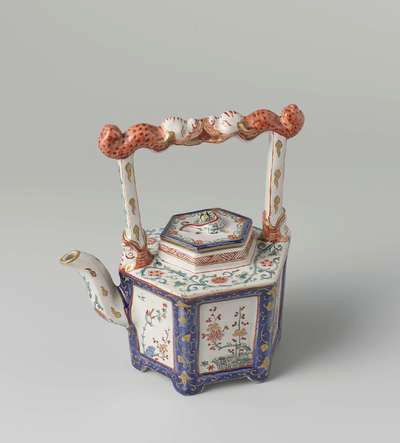


the data about the size and format here are found under all metadata:

```
Mate (extent)
hoogte 15 cm  breedte 14 cm
Vorm (format)
faience
```
In chapter one I wrote a script to extract the dctermsExtent and dcFormat. After inspection and some tryouts, I decided to only work with the dctermsExtent. The goal here is to clean some data regarding size to be able to visualize data referring to the measurements of teapots.

The problem now is that we have two datasets, or two projects in OpenRefine.
The next step should be on how to match the dataset from the full working code and the dataset from the script extracting the size related data. This can easily be done in OpenRefine. We can use the cross function to extract data (in this case columns) from project B to project A (both projects being opened in OpenRefine). This can be done one the basis of an overlapping column (with unique identifiers) between the two projects, in this case with help of the Europeana ID. If we use the Europeana ID as matching element, all info regarding size can be mapped properly to the already existing records.

In project A (allteapotsallmetadata) I create a new column on the basis of the column of EID. In the GREL box I put the code below.'EID' refers to europeana_id (overlapping column) and 'extendeddata' refers to project B ( project with data representing size); dctermsExtent is the column of data that will be extracted on the basis of the matching EID's.

code: `with(cell.cross("extendeddata", "EID"), matches, if(matches.length() > 0, matches[0].cells["dctermsExtent"].value, "no match"))`

> example: in project A for EID with value /376/photography_ProvidedCHO_Royal_Institute_for_Cultural_Heritage__KIK_IRPA___Brussels__Belgium__KIK_IRPA_n__11045761, the extraction will add hauteur: 11.5 cm; height: 11.5 cm from project B.

the next question will be on how to standardize these measurements. This can be done with GREL. This way we can try to capture as much as possible, so that we have a big enough pool of measurements to calculate values with.

extract height values

code: `value.replace(",", ".").toLowercase().find(/(hauteur|hoogte|height|h|höhe)\s*[:=]?\s*\d+\.?\d*\s*(?:cm|mm|m|in|ft)/i).join(", ")`

extract width values

code: `value.replace(",", ".").toLowercase().find(/(largeur|width|w|breite|breedte)\s*[:=]?\s*\d+\.?\d*\s*(?:cm|mm|m|in|ft)/i).join(", ")`

extract length values

code: `value.replace(",", ".").toLowercase().find(/(Länge|length|Longitud|Largo|Lengte)\s*[:=]?\s*\d+\.?\d*\s*(?:cm|mm|m|in|ft)/i).join(", ")`

extract diameter values

code: `value.replace(",", ".").toLowercase().find(/(?:Diámetro|diameter|dm|Durchmesser|Perímetro|diamètre|voet\s*diam)\s*[:=]?\s*\d+\.?\d*\s*(?:cm|mm|m|in|ft)/i).join(", ")`

It still needs some tweaking, but should be good enough for now. The most important part is that we were able to extract some data according to specific conditions (the code). If we expand on the code/GREL, this should account for more values. This takes time, which I cannot spend here.

How to combine them?

first I wanted to clean it further by removing all extra words from the data such as 'height, 'longeur', 'b', etcetera. This is possible with GREL on the basis of code used earlier. I applied the code below to width, height, length and diameter.

code: `value.replace(",", ".").toLowercase().find(/(?)\s*?\s*\d+\.?\d*\s*(?:cm|mm|m|in|ft)/i).join(", ")`

next I only want the first digit, if there are duplicates. An easy way (not perfect) is via the code below. I apply this on the length, width and height fields.

code: `value.replace(",", ".").toLowercase().find(/\s*[:=]?\s*\d+\.?\d*\s*(?:cm|mm|m|in|ft)/i)[0]`



example:



## 2.2.4 Add column based from reconciled data

In my data I had some fields regarding 'PlaceLabel', often referring to the city or country the object has it's origin. Because these were filled in inconsistently, alternating between cities and countries, I wanted to come up with a solution to extract all the respective countries. I also got the impression that the list of countries was better or more accurate that way than with the 'country' field that came with the original script.

For this reason I decided to reconcile the cities for their respective countries. In a next phase I extracted these matched values in a new column to visualise my distribution of teapots among different countries.

code: `cell.recon.match.name`

To do this I selected the column and created a new column from the reconciled data. Here I could select to create a new column based on the country that is connected to these object in the metadata.

> example: If I want the reconciled countries that are associated with the cities:'Liestal' gets a new value in a new column, namely 'Switzerland' via the code above.



## 2.2.5 Joining the cities/countries columns + cleaning duplicates?

I noticed that I have location info about cities, sometimes about countries, sometimes none, sometimes both. I wanted to get as much city and country information as possible and standardize the data. To do this I first cleaned the country/city column (took away brackets and other noise) and then joined all columns with location data together by a logical separator (in this case a ','). Next I used code to remove duplicates from these cells (see above). When there were no duplicates left per record, i split the cells into multi-values cells so they could be counted properly in OpenRefine (or Tableau).

To get more consistent data, I clustered the facets multiple times and afterwards I again joined the values together and deleted the duplicates with the method described above.

code to remove duplicates (as above): `value.split(",").uniques().join(",")`

Afterwards I also reconciled the data on the basis of country via wikidata. This means that all cities and countries will get a reconciled value that should be the country related to the city (or the exact same country). I did this and then checked and cleaned the facets a bit manually, until most noise was gone. I did the same with cities, but this was less succesfull. After reconciling and checking the values, we can take these values and extract them in a new column. If we do not do this, the underlying values stay the values before reconciliation!

code: `cell.recon.match.name`

In the end I have columns with data about country and city, of which I know are logically connected. I hope to visualize both in Tableau.



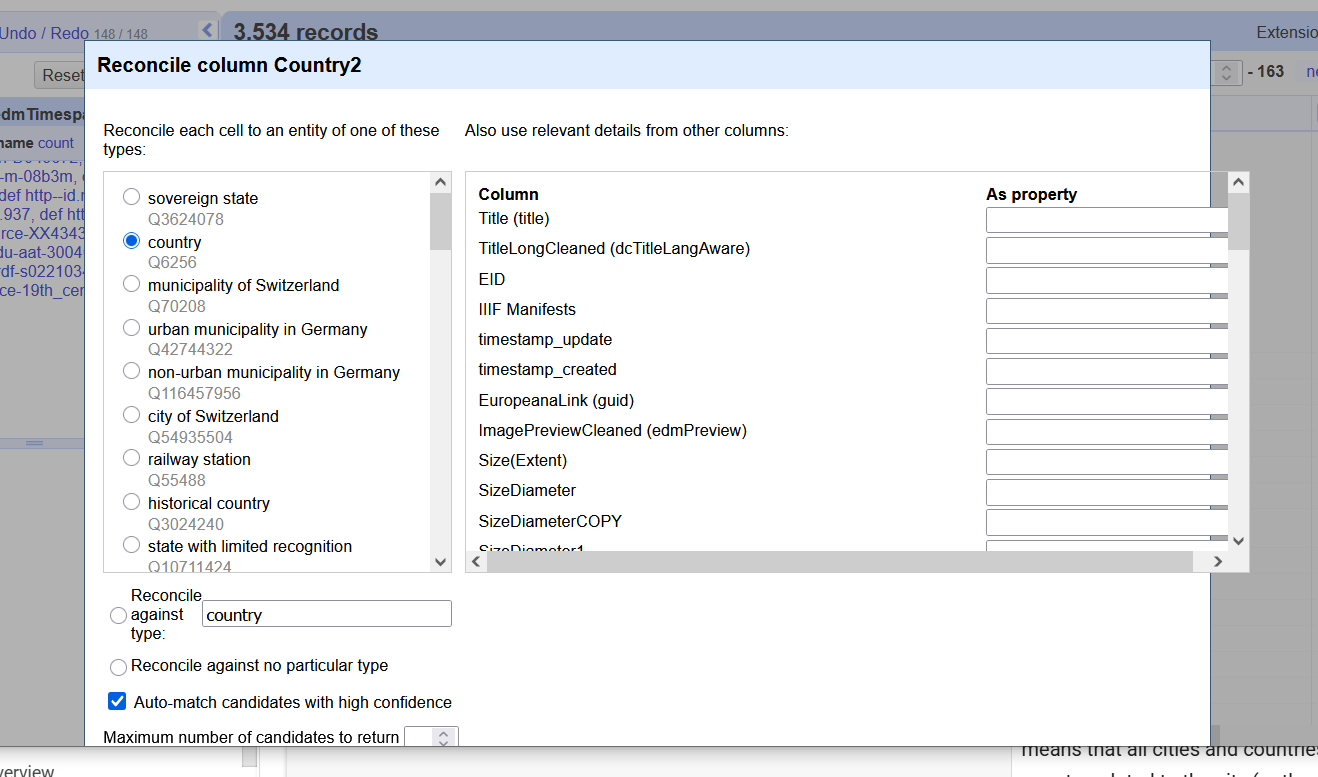

# 2.3 Neverending refining

A dataset is never fully cleaned. There is always more work to be done. Below I take some final steps to 'finish' the dataset.


## 2.3.0 Full cleanup

Now that I have worked out all the cleaning and enrichment I wanted to do in OpenRefine, we are ready to finalize the dataset. I deleted all columns that I did not plan to use for my visualisation. This should work much more easily and give a clean overview. This dataset will be exported and used for visualisation in Tableau. To do this, I will also first make some calculations in Excel.

To give an idea of how the final cleaning process went: I kept track of each transformation of my 'related concepts' column. I deleted all columns regarding related concepts, except for the one I'm using for my visualisation.

> example: 'PlaatsLabelCleanedClustered', 'PlaatsLabelCleanedClusteredJoinednoDuplicates','PlaatsLabelCleanedClusteredJoinednoDuplicatesReconciled' got deleted.

I also renamed all my columns to more workable titles. All the different transformations are not important anymore here, as I will only work with the final product and hope not to have to return to OpenRefine after this.

> example: 'PlaatsLabelCleanedClusteredJoinednoDuplicatesReconciledExtracted' to 'PlaceLabel' and so on.

update: later I will do some extra renaming in Tableau.


## 2.3.1 Overview

In this part I give a quick overview of what we have done this chapter.

All cleaning and refining resulted in an overview of my data in the following way:

```
Title (title)
TitleLongCleaned (dcTitleLangAware)
EID
EuropeanaLink (guid)
ImagePreviewCleaned (edmPreview)
Size(Extent)
SizeDiameter
SizeLength
SizeWidth
SizeHeight
CrossextendedFormat
Rights
Country1
Language
ShortDescription
Subject
Type
RelatedConceptsCleaned (edmConceptPrefLabelLangAware)
RelatedCOnceptsCleanedClusteredReconciledExtractedNoDuplicates (EdmConceptLabel)
DataProviderCleaned
ProviderCleaned
PlaceLabel
PlaceLabelrecon
country
LatitudeAverage
LongitudeAverage
DateOrigin (edmTimespanLabel)
FirstFourdigitsYearNumber
SecondFourDigitsYearNumber
CombinedFirstSecondYear
YearCleaned
```

Again, this will also be further renamed in Tableau.

## 2.3.2 Export and next steps

This part discusses what can still be done and also leaves space to discuss additional cleaning that was made during the visualisation phase. Finally, we look at how to export the data from and to OpenRefine.

After you have a final version of the cleaned dataset, it is time to export it to Excel or Tableau. To do this, one can simply press the 'export' button in OpenRefine. Here one can select the format of the exported dataset. In this case we choose for xlx (2007+) and/or csv, because we want to add some calculated data to the dataset later in Excel.
You can also save/export your OpenRefine project as a .tar file. This saves the project in the format of Openrefine, which can then be worked on later by importing/opening it again in OpenRefine. Every now and then I exported a version of my project, hence the allteapotsmetadatav1, or allteapotsmetadatav13 in some screenshots. This is very usefull, because it also saves your history of steps in OpenRefine.

One final remark: before exporting, make sure your number of rows and records are the same. Otherwise you will create duplicate rows and counting will not correct in your data visualisation software. To get the same number of records as rows, one needs to join multi-valued cells that were created earlier. Only if all multi-valued cells are joined again (with a separator) into single cells, we can start exporting.

update: I need to correct myself here! The information above is not true. To make proper counts and facets, it is important to split the multi valued cells (and keeps the added cells in other columns blank, because if you copy the values from other columns, you will again end up with confusing counts).

